In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=sns.load_dataset('iris') 


In [4]:
df.sample(random_state=42, frac=0.1)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [6]:
le.classes_,le.inverse_transform([0,1,2])

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array(['setosa', 'versicolor', 'virginica'], dtype=object))

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('species',axis=1),df['species'],test_size=0.2,random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=3,n_jobs=-1,random_state=42,max_depth=2)

In [9]:
rf2=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42,max_depth=2)

In [10]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)



In [12]:
rf2.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=42)

In [13]:
rf2.score(pca.transform(x_test),y_test)

0.9333333333333333

In [14]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [15]:
xx,yy=make_meshgrid(x_train_pca[:,0],x_train_pca[:,1])

In [16]:
Z = rf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

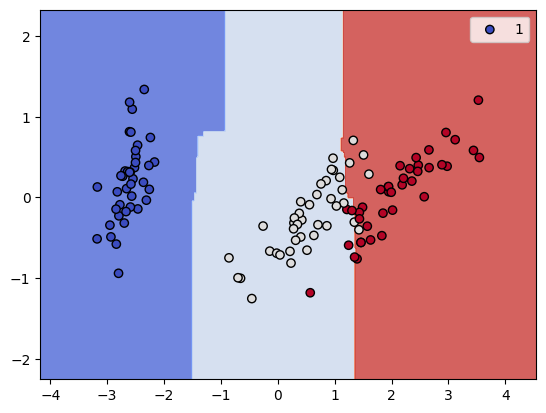

In [17]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap=plt.cm.coolwarm,edgecolors='k')
plt.legend(y_test.unique())

In [18]:
#sns.pairplot(df,hue='species')

In [19]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=42)   
x_train_tsne=tsne.fit_transform(x_train)


In [20]:
x_train_tsne.shape

(120, 2)

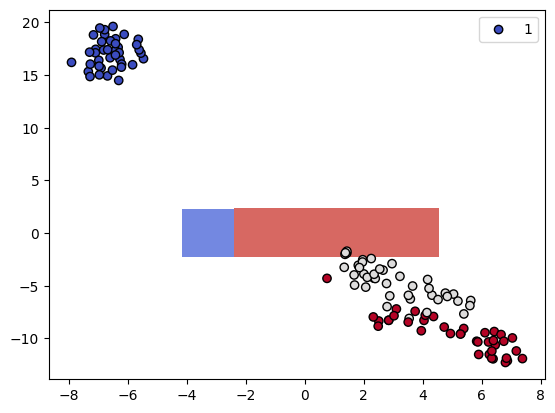

In [21]:
rf3=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42,max_depth=2)
rf3.fit(x_train_tsne,y_train)
Z = rf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)    
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=y_train,cmap=plt.cm.coolwarm,edgecolors='k')
plt.legend(y_test.unique())


In [22]:
rf3.score(x_train_tsne,y_train)

0.9583333333333334

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9468960016420044

<h1>rf -> ranndomforest with score 1.0</h1>
<h1>rf2 -> ranndomforest on PCA features with score 0933.</h1>
<h1>rf3 -> ranndomforest on tsne features with score 0.958</h1>
<h1>lf -> linear regression with score 0.94</h1>

In [24]:
import pickle
pickle.dump(rf,open('lr.pkl','wb'))